In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import numpy as np 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:

df = pd.read_csv(r"C:\Users\mauli\Downloads\archive (4)\creditcard.csv")



In [5]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [6]:
df.tail(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.0,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#valuecounts for normal and fraud counts
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
#seperate
Normal = df[df.Class==0]
Fraud = df[df.Class==1]

In [11]:
print(Normal.shape)
print(Fraud.shape)

(284315, 31)
(492, 31)


In [12]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Data Visualization

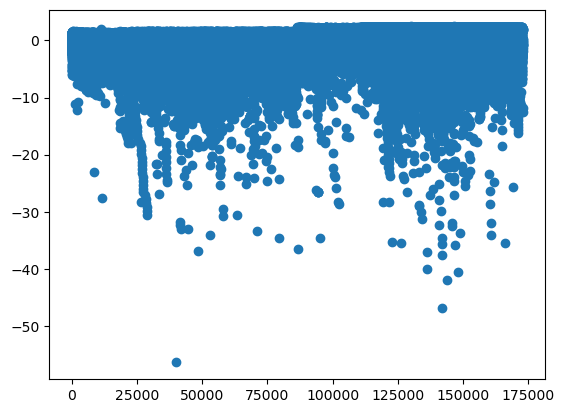

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [15]:
#Comparision of values
df.groupby('Class').mean()
#it will give the mean

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Preprocessing of data

In [16]:
#undersampling
# here we will make new dataset to train the model
Normal_sample=Normal.sample(n=492)

In [17]:
#Concating two dataframes
training_dataset =pd.concat([Normal_sample,Fraud],axis=0)

In [18]:
training_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
153536,99349.0,-0.650917,-3.862571,-1.530352,4.856867,-0.843369,1.746457,1.114694,-0.187290,0.798672,...,0.785774,-0.395642,-1.044279,-0.085348,-0.611521,-0.135229,-0.260268,0.194869,1340.14,0
222602,143047.0,-1.829690,2.050740,-1.945653,-1.484203,0.619171,-1.404055,1.087986,0.254452,0.652165,...,0.081288,0.659280,-0.111991,-0.515029,0.016241,0.137662,0.870989,0.629460,7.70,0
249692,154534.0,2.084066,-0.885052,-1.554755,-0.389949,-0.385267,-0.726669,-0.231486,-0.345650,-0.446395,...,-0.086111,0.232749,-0.087011,-0.669218,0.105087,0.799282,-0.063426,-0.058248,82.54,0
237903,149446.0,2.068113,0.297868,-2.133628,0.909568,1.113392,-0.419135,0.621373,-0.225660,-0.356991,...,0.138015,0.444717,-0.033856,0.212394,0.501378,-0.503368,-0.039152,-0.072839,1.00,0
170684,120307.0,2.131729,-1.697991,-0.362026,-1.641352,-1.589246,0.070249,-1.637426,0.166083,-1.068407,...,-0.249772,-0.405267,0.435402,0.632864,-0.656204,-0.466259,0.029668,-0.030459,55.00,0


In [19]:
training_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
training_dataset['Class'].value_counts()
#This would act as good dataset to train the model

Class
0    492
1    492
Name: count, dtype: int64

# Split data into features and target for the porpose of training model

In [21]:
X=training_dataset.drop(columns='Class',axis=1)
y=training_dataset['Class']

In [22]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
153536,99349.0,-0.650917,-3.862571,-1.530352,4.856867,-0.843369,1.746457,1.114694,-0.187290,0.798672,...,2.490665,0.785774,-0.395642,-1.044279,-0.085348,-0.611521,-0.135229,-0.260268,0.194869,1340.14
222602,143047.0,-1.829690,2.050740,-1.945653,-1.484203,0.619171,-1.404055,1.087986,0.254452,0.652165,...,0.422893,0.081288,0.659280,-0.111991,-0.515029,0.016241,0.137662,0.870989,0.629460,7.70
249692,154534.0,2.084066,-0.885052,-1.554755,-0.389949,-0.385267,-0.726669,-0.231486,-0.345650,-0.446395,...,-0.440652,-0.086111,0.232749,-0.087011,-0.669218,0.105087,0.799282,-0.063426,-0.058248,82.54
237903,149446.0,2.068113,0.297868,-2.133628,0.909568,1.113392,-0.419135,0.621373,-0.225660,-0.356991,...,-0.259413,0.138015,0.444717,-0.033856,0.212394,0.501378,-0.503368,-0.039152,-0.072839,1.00
170684,120307.0,2.131729,-1.697991,-0.362026,-1.641352,-1.589246,0.070249,-1.637426,0.166083,-1.068407,...,-0.345081,-0.249772,-0.405267,0.435402,0.632864,-0.656204,-0.466259,0.029668,-0.030459,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
y

153536    0
222602    0
249692    0
237903    0
170684    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [24]:
# split training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


# Synthatic Minority Oversampling Technique(SMOTE)

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smote = SMOTE(random_state=42)

In [31]:
X_train_smote,y_train_smote =smote.fit_resample(X_train,y_train)

C:\Users\mauli\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [32]:
print(y_train_smote.value_counts())
# we can use this data to train the model

Class
0    394
1    394
Name: count, dtype: int64


# Model Training

In [33]:
#from sklearn.ensemble import IsolationForest,LocalOutlierFactor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor

In [35]:
models  ={
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    
    #"Local Outlier Fit" :LocalOutlierFactor(n_neighbors=20)
    #"XGBoost" : XGBClassifier(random_state=42)
}

In [36]:
cv_scores = {}

for model_name,model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross validation accuracy :{np.mean(scores):.2f}")


Training Decision Tree with default parameters
Decision Tree cross validation accuracy :0.90
Training Random Forest with default parameters
Random Forest cross validation accuracy :0.94


# Use Decission Tree algorithm for good accuracy

In [37]:
dtm = DecisionTreeClassifier(random_state=42)

In [38]:
dtm.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(random_state=42)

# Model Evaluation

In [40]:
y_test_pred = dtm.predict(X_test)

In [41]:
print("Accuracy Score :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report :\n",classification_report(y_test,y_test_pred))
    

Accuracy Score : 0.934010152284264
Confusion Matrix :
 [[91  8]
 [ 5 93]]
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        99
           1       0.92      0.95      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [43]:
model_data = {
    "model" :dtm,
    "features" : X.columns.tolist()
}

In [44]:
model_data

{'model': DecisionTreeClassifier(random_state=42),
 'features': ['Time',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'Amount']}

# Loading the model and detect the fraud

In [45]:
loaded_model = model_data["model"]

In [46]:
loaded_model

DecisionTreeClassifier(random_state=42)

In [49]:
testing_model_data = {
    "Time": 0,
    "V1": -1.3598071336738,
    "V2": -0.0727811733098497,
    "V3": 2.53634673796914,
    "V4": 1.37815522427443,
    "V5": -0.338320769942518,
    "V6": 0.462387777762292,
    "V7": 0.239598554061257,
    "V8": 0.0986979012610507,
    "V9": 0.363786969611213,
    "V10": 0.0907941719789316,
    "V11": -0.551599533260813,
    "V12": -0.617800855762348,
    "V13": -0.991389847235408,
    "V14": -0.311169353699879,
    "V15": 1.46817697209427,
    "V16": -0.470400525259478,
    "V17": 0.207971241929242,
    "V18": 0.0257905801985591,
    "V19": 0.403992960255733,
    "V20": 0.251412098239705,
    "V21": -0.018306777944153,
    "V22": 0.277837575558899,
    "V23": -0.110473910188767,
    "V24": 0.0669280749146731,
    "V25": 0.128539358273528,
    "V26": -0.189114843888824,
    "V27": 0.133558376740387,
    "V28": -0.0210530534538215,
    "Amount": 149.62
}


In [51]:
testing_data_df=pd.DataFrame([testing_model_data])

In [52]:
testing_data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62


In [57]:
prediction = loaded_model.predict(testing_data_df)
print(prediction)
probablity = loaded_model.predict_proba(testing_data_df)
print(f"Prediction:{'Fraud' if prediction[0]==1 else 'Normal '}")

[0]
Prediction:Normal 
